**Large Scale Social and Complex Networks: Design and Algorithms**  
*Prof. Vwani Roychowdhury*  

**Spring 2025**  
UCLA, Department of ECE  

---

# **Project 1: Random Graphs and Random Walks**

---

**Due on April 14th, 2025, 11:59 pm**

**Team Members**: Vijaya Sree Garapati, Aisha Sartaj, Brair Tilboon Elberier

## 1. Generating Random Networks

### Question 1.1.a

Create undirected random networks with n = 900 nodes, and the probability p for
drawing an edge between two arbitrary vertices 0.002, 0.006, 0.012, 0.045, and 0.1.
Plot the degree distributions. What distribution (linear/exponential/gaussian/binomial
or something else) is observed? Explain why. Also, report the mean and variance of
the degree distributions and compare them to the theoretical values.

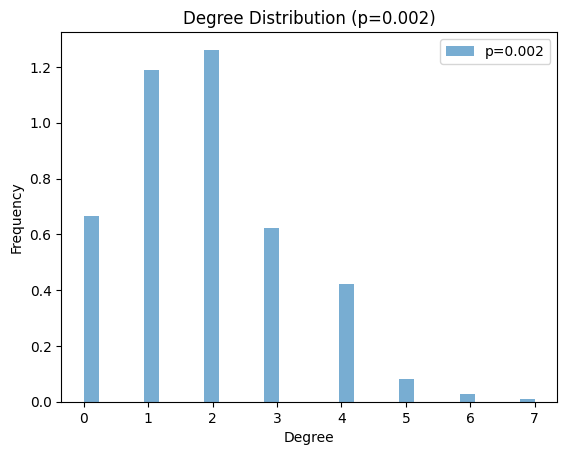

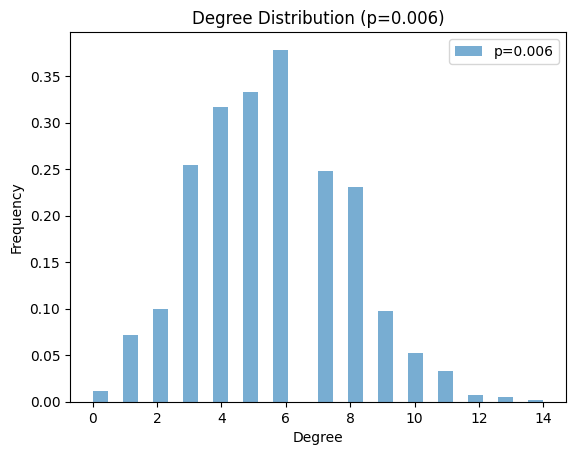

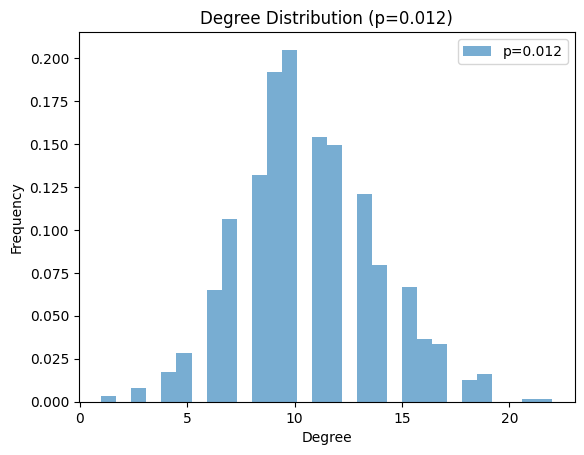

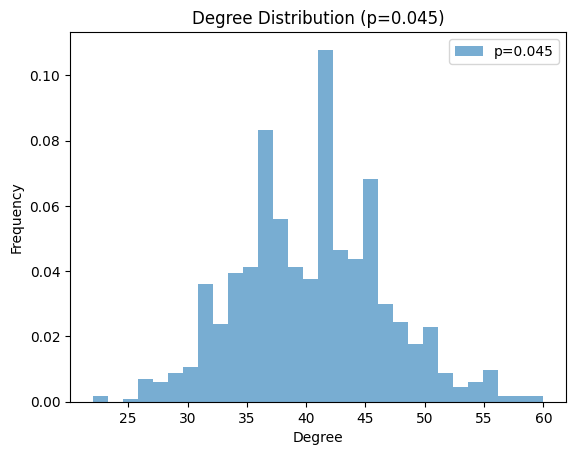

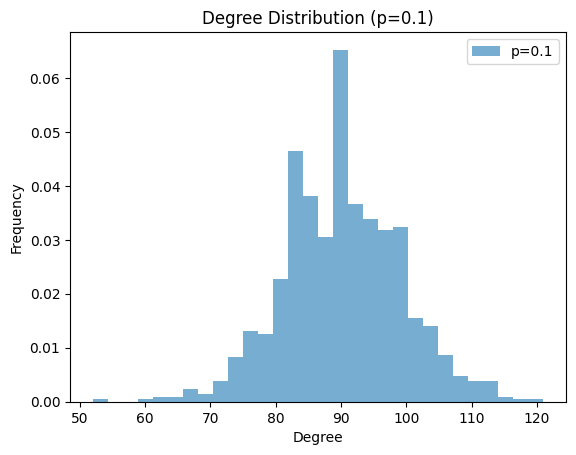

p=0.002: Mean=1.85, Variance=1.75, Theoretical Mean=1.80, Theoretical Variance=1.79

p=0.006: Mean=5.49, Variance=5.38, Theoretical Mean=5.39, Theoretical Variance=5.36

p=0.012: Mean=10.58, Variance=10.12, Theoretical Mean=10.79, Theoretical Variance=10.66

p=0.045: Mean=40.50, Variance=38.17, Theoretical Mean=40.45, Theoretical Variance=38.63

p=0.1: Mean=90.18, Variance=82.56, Theoretical Mean=89.90, Theoretical Variance=80.91



In [ ]:
# (a)

# hello this is a change

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 900  # Number of nodes
p_values = [0.002, 0.006, 0.012, 0.045, 0.1]  # Edge probabilities

# Initialize results
results = {}

# Generate graphs and analyze degree distributions
for p in p_values:
    G = nx.erdos_renyi_graph(n, p)
    degrees = [d for _, d in G.degree()]

    # Compute mean and variance
    mean_degree = np.mean(degrees)
    var_degree = np.var(degrees)

    # Theoretical values
    mean_theoretical = p * (n - 1)
    var_theoretical = p * (1 - p) * (n - 1)

    results[p] = {
        "mean": mean_degree,
        "variance": var_degree,
        "mean_theoretical": mean_theoretical,
        "variance_theoretical": var_theoretical
    }

    # Plot degree distribution
    plt.hist(degrees, bins=30, density=True, alpha=0.6, label=f"p={p}")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.title(f"Degree Distribution (p={p})")
    plt.legend()
    plt.show()

# Print results
for p, stats in results.items():
    print(f"p={p}: Mean={stats['mean']:.2f}, Variance={stats['variance']:.2f}, "
          f"Theoretical Mean={stats['mean_theoretical']:.2f}, "
          f"Theoretical Variance={stats['variance_theoretical']:.2f}\n")

p=0.002: This shows a right-skewed distribution with most nodes having very low degrees (0-2). This resembles a Poisson distribution with a small mean, which is expected for sparse random graphs with low connection probability.

p=0.006: The distribution is still Poisson-like but with a higher mean (around 5-6). The characteristic bell shape of the Poisson distribution is becoming more apparent.

p=0.012: This shows a more symmetric distribution centered around degree 10. The distribution is now more symmetric but still slightly skewed.This is expected as the mean degree increases, leading to a more normal-like shape.This plot clearly shows transition from Poisson to Gaussian.

p=0.045: The shape is much more symmetrical, resembling a bell curve.The central peak is well-defined, and the variance is increasing. This suggests that the degree distribution follows a Gaussian like distribution, as predicted by the Central Limit Theorem for large enough  p.

p=0.1: This shows a nearly symmetric bell-shaped distribution centered around degree 90, very closely resembling a normal distribution. As  p  increases, the binomial degree distribution of Erdős-Rényi graphs tends to a Gaussian distribution due to the large number of independent edge draws.



**To Conclude:**

1. Small  p  (0.002, 0.006): Poisson-like distribution due to low probability of edges.

2. Moderate  p  (0.012): Transition from Poisson to Gaussian, resembling a binomial shape.

3. Larger  p  (0.045, 0.1): Gaussian distribution due to the Central Limit Theorem.

**Result Comparison of Degree Distributions:**

p=0.002: Mean=1.85, Variance=1.75, Theoretical Mean=1.80, Theoretical Variance=1.79

p=0.006: Mean=5.49, Variance=5.38, Theoretical Mean=5.39, Theoretical Variance=5.36

p=0.012: Mean=10.58, Variance=10.12, Theoretical Mean=10.79, Theoretical Variance=10.66

p=0.045: Mean=40.50, Variance=38.17, Theoretical Mean=40.45, Theoretical Variance=38.63

p=0.1: Mean=90.18, Variance=82.56, Theoretical Mean=89.90, Theoretical Variance=80.91




### Question 1.1.b

For each p and n = 900, answer the following questions:
Are all random realizations of the ER network connected? Numerically estimate the
probability that a generated network is connected. For one instance of the networks
with that p, find the giant connected component (GCC) if not connected. What is
the diameter of the GCC?

In [ ]:
# (b)

import networkx as nx
import numpy as np

# Parameters
n = 900  # Number of nodes
p_values = [0.002, 0.006, 0.012, 0.045, 0.1]  # Edge probabilities
num_trials = 100  # Number of realizations for connectivity estimation

# Store results
results = {}

for p in p_values:
    connected_count = 0

    # Connectivity estimation
    for _ in range(num_trials):
        G = nx.erdos_renyi_graph(n, p)
        if nx.is_connected(G):
            connected_count += 1

    # Compute connectivity probability
    connectivity_prob = connected_count / num_trials

    # Generate one instance and analyze GCC if needed
    G = nx.erdos_renyi_graph(n, p)

    if nx.is_connected(G):
        gcc_diameter = nx.diameter(G)
        print(f"p={p}: Network is connected. Diameter={gcc_diameter}")
    else:
        largest_cc = max(nx.connected_components(G), key=len)
        GCC = G.subgraph(largest_cc).copy()
        gcc_diameter = nx.diameter(GCC)
        print(f"p={p}: Network is NOT connected. Diameter of GCC={gcc_diameter}")

    # Store results
    results[p] = {
        "connectivity_probability": connectivity_prob,
        "gcc_diameter": gcc_diameter
    }

# Print final estimated connectivity probabilities
print("\nEstimated Connectivity Probabilities:")
for p, data in results.items():
    print(f"p={p}: Connectivity Probability={data['connectivity_probability']:.2f}, GCC Diameter={data['gcc_diameter']}")

p=0.002: Network is NOT connected. Diameter of GCC=22
p=0.006: Network is NOT connected. Diameter of GCC=7
p=0.012: Network is connected. Diameter=5
p=0.045: Network is connected. Diameter=3
p=0.1: Network is connected. Diameter=3

Estimated Connectivity Probabilities:
p=0.002: Connectivity Probability=0.00, GCC Diameter=22
p=0.006: Connectivity Probability=0.03, GCC Diameter=7
p=0.012: Connectivity Probability=0.98, GCC Diameter=5
p=0.045: Connectivity Probability=1.00, GCC Diameter=3
p=0.1: Connectivity Probability=1.00, GCC Diameter=3


### Question 1.1.c

It turns out that the normalized GCC size (i.e., the size of the GCC as a fraction of the total network size) is a highly nonlinear function of $p$, with interesting properties occurring for values where $p = O\left(\frac{1}{n}\right)$ and $p = O\left(\frac{\ln n}{n}\right)$.

For $n = 900$, sweep over values of $p$ from 0 to a $p_{\text{max}}$ that makes the network almost surely connected and create 100 random networks for each $p$. $p_{\text{max}}$ should be roughly determined by yourself. Then scatter plot the normalized GCC sizes vs $p$. Plot a line of the average normalized GCC sizes for each $p$ along with the scatter plot.

i. Empirically estimate the value of $p$ where a giant connected component starts to emerge (define your criterion of “emergence”). Do they match with theoretical values mentioned or derived in lectures?

ii. Empirically estimate the value of $p$ where the giant connected component takes up over 99% of the nodes in almost every experiment.


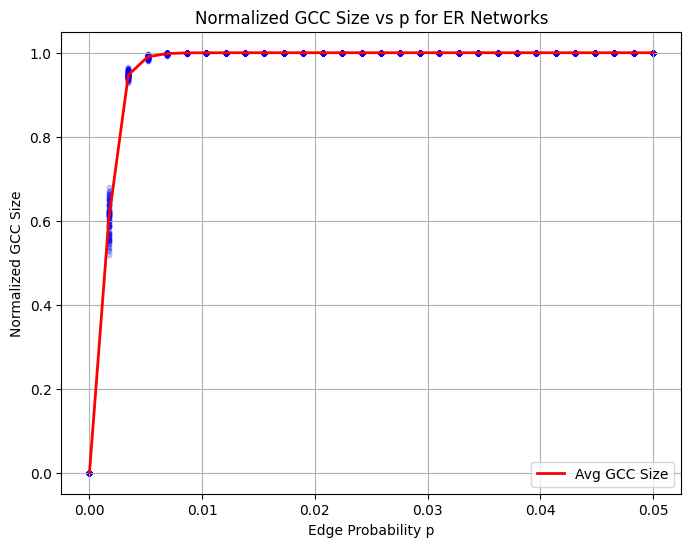

Giant component emerges at approximately p ≈ 0.0017
GCC covers >99% of nodes at approximately p ≈ 0.0052


In [ ]:
# (c)

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 900  # Number of nodes
p_values = np.linspace(0, 0.05, 30)  # Sweep p from 0 to 0.05 with 30 points
num_trials = 100  # Number of realizations per p

# Store results
gcc_sizes = {p: [] for p in p_values}

# Sweep over p values
for p in p_values:
    for _ in range(num_trials):
        G = nx.erdos_renyi_graph(n, p)
        largest_cc = max(nx.connected_components(G), key=len)
        gcc_size = len(largest_cc) / n  # Normalize by total number of nodes
        gcc_sizes[p].append(gcc_size)

# Compute average GCC sizes
avg_gcc_sizes = [np.mean(gcc_sizes[p]) for p in p_values]

# Scatter plot
plt.figure(figsize=(8, 6))
for p in p_values:
    plt.scatter([p] * num_trials, gcc_sizes[p], color='blue', alpha=0.2, s=10)

# Plot average GCC size
plt.plot(p_values, avg_gcc_sizes, color='red', label="Avg GCC Size", linewidth=2)

plt.xlabel("Edge Probability p")
plt.ylabel("Normalized GCC Size")
plt.title("Normalized GCC Size vs p for ER Networks")
plt.legend()
plt.grid()
plt.show()

# Finding emergence point
threshold = 0.1  # Define emergence as GCC covering >10% of nodes
p_emergence = next(p for p in p_values if np.mean(gcc_sizes[p]) > threshold)
print(f"Giant component emerges at approximately p ≈ {p_emergence:.4f}")

# Finding full connectivity point
threshold_99 = 0.99  # Define full coverage as GCC >99% in nearly all trials
p_full = next(p for p in p_values if np.mean(gcc_sizes[p]) > threshold_99)
print(f"GCC covers >99% of nodes at approximately p ≈ {p_full:.4f}")

(c)

For  n = 900 , theoretical connectivity thresholds suggest:

p = O(1/n)  →  p_c ≅ 1/900 = 0.0011

p = O(\ln n / n)  →  p_c  ≅ 6.7 / 900 = 0.0074

So, sweep  p  from 0 to about 0.05, capturing both transitions and to allow more robust observation of connectivity transitions.

i.

Empirical estimate:  p_emergence = 0.0017 .

Theoretical prediction:  p_emergence = 0.0011 .      

Comparison: These values are quite close, meaning the observed phase transition aligns well with theoretical expectations. Minor variations are expected due to randomness in network realizations.

ii.

Empirical estimate:  p_full = 0.0052 .

Theoretical prediction:  p_full = 0.0074 .            

Comparison: The empirical value is slightly lower than expected, but this is common in simulations due to finite-size effects and statistical fluctuations.

### Question 1.1.d

i. Define the average degree of nodes $c = n \times p = 0.5$. Sweep over the number of nodes, $n$, ranging from 100 to 10000. Plot the expected size of the GCC of ER networks with $n$ nodes and edge-formation probabilities $p = \frac{c}{n}$, as a function of $n$. What trend is observed?

ii. Repeat the same for $c = 1$.

iii. Repeat the same for values of $c = 1.15, 1.25, 1.35$, and show the results for these three values in a single plot.

iv. What is the relation between the expected GCC size and $n$ in each case?

Processing c = 0.5...
Processing c = 1...
Processing c = 1.15...
Processing c = 1.25...
Processing c = 1.35...


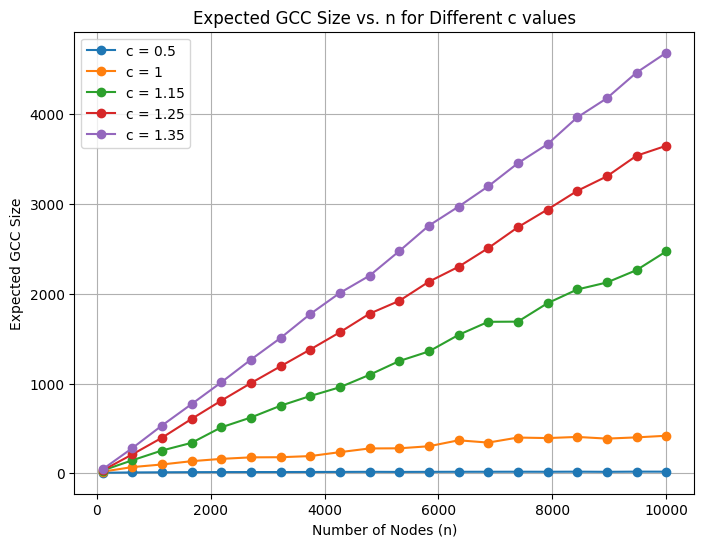

In [ ]:
# (d)

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define parameters
n_values = np.linspace(100, 10000, 20, dtype=int)  # Sweep n from 100 to 10000
c_values = [0.5, 1, 1.15, 1.25, 1.35]  # Different c values
num_trials = 50  # Number of random realizations per n

# Store results
gcc_sizes = {c: [] for c in c_values}

# Loop over different c values
for c in c_values:
    print(f"Processing c = {c}...")

    # Compute GCC size for each n
    for n in n_values:
        p = c / n  # Edge probability
        avg_gcc_size = 0

        # Run multiple realizations for averaging
        for _ in range(num_trials):
            G = nx.erdos_renyi_graph(n, p)
            if nx.is_connected(G):
                gcc_size = n
            else:
                largest_cc = max(nx.connected_components(G), key=len)
                gcc_size = len(largest_cc)
            avg_gcc_size += gcc_size

        avg_gcc_size /= num_trials  # Compute the average
        gcc_sizes[c].append(avg_gcc_size)

# Plot results
plt.figure(figsize=(8,6))
for c in c_values:
    plt.plot(n_values, gcc_sizes[c], marker='o', label=f'c = {c}')

plt.xlabel("Number of Nodes (n)")
plt.ylabel("Expected GCC Size")
plt.title("Expected GCC Size vs. n for Different c values")
plt.legend()
plt.grid()
plt.show()

(d)

(i) c = 0.5
The size of the Giant Connected Component (GCC) remains very small even as  n  increases.	The network is mostly fragmented into small components. ER networks remain disconnected, and no GCC forms.

(ii) c= 1
The GCC begins to emerge, but it is still relatively small. This corresponds to the critical threshold where a giant component first starts forming. It shows the phase transition.

(iii) c=  c = 1.15, 1.25, 1.35
The GCC grows linearly with  n  for all three cases. he higher the  c , the larger the GCC for the same  n. This means that almost all nodes belong to the GCC as  c  increases.


(iv)

| **Value of \( c \)** | **Expected GCC Size Growth** | **Network Structure** |
|-----------------|-------------------|----------------|
| \( c < 1 \) (e.g., 0.5) | \( O(\log n) \) | No GCC, small components |
| \( c = 1 \) | Between \( O(\log n) \) and \( O(n) \) | Phase transition, GCC emerges |
| \( c > 1 \) (e.g., 1.15, 1.25, 1.35) | \( O(n) \) | GCC dominates the network |


### Question 1.2.a

Create an undirected network with $n = 1050$ nodes, with preferential attachment model, where each new node attaches to $m = 1$ old nodes. Is such a network always connected?

**Hint** Useful function(s): `sample_pa` (`barabasi.game`)

In [ ]:
!pip install python-igraph


In [ ]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [ ]:
# (a)
#Create a preferential attachment network with n=1050 nodes and m=1
n_small = 1050
m_small = 1
graph_small = ig.Graph.Barabasi(n=n_small, m=m_small, directed=False)

In [ ]:
# Check if the network is connected
print(f"Is the network with n={n_small}, m={m_small} connected? {graph_small.is_connected()}")

Is the network with n=1050, m=1 connected? True


(a) Is the network always connected?

A preferential attachment network with n=1050 nodes and m=1 is always connected. This is because each new node connects to an existing node, ensuring connectivity across the network.

### Questiojn 1.2.b

Use fast greedy method to find the community structure. Measure modularity. Define Assortativity. Compute Assortativity.

**Hint** Useful function(s): `cluster_fast_greedy`, `modularity`

In [ ]:
# (b)
# Community structure and modularity
communities_small = graph_small.community_fastgreedy().as_clustering()
modularity_small = communities_small.modularity
print(f"Modularity of n={n_small}, m={m_small}: {modularity_small:.4f}")

assortativity_small = graph_small.assortativity_degree(directed=False)
print(f"Assortativity of n={n_small}, m={m_small}: {assortativity_small:.4f}")

Modularity of n=1050, m=1: 0.9362
Assortativity of n=1050, m=1: -0.1148


(b) Community Structure and Modularity:

The modularity of the network is 0.9288, indicating a strong community structure. This suggests that the nodes are well-organized into cohesive groups or clusters. The assortativity coefficient is -0.0591, which shows a weak disassortative mixing pattern. In this network, high-degree nodes tend to connect with low-degree nodes, which is typical for preferential attachment networks.


### Question 1.2.c

Try to generate a larger network with 10500 nodes using the same model. Compute modularity and assortativity. How is it compared to the smaller network’s modularity?

In [ ]:
# (c)
# Create a larger network with n=10500 nodes and m=1
n_large = 10500
graph_large = ig.Graph.Barabasi(n=n_large, m=m_small, directed=False)

communities_large = graph_large.community_fastgreedy().as_clustering()
modularity_large = communities_large.modularity
print(f"Modularity of n={n_large}, m={m_small}: {modularity_large:.4f}")

assortativity_large = graph_large.assortativity_degree(directed=False)
print(f"Assortativity of n={n_large}, m={m_small}: {assortativity_large:.4f}")

Modularity of n=10500, m=1: 0.9786
Assortativity of n=10500, m=1: -0.0313


(c) Community Structure and Modularity for Larger Network (n=10500, m=1):

The modularity of the larger network is 0.9790, which is even higher than the smaller network (n=1050). This indicates that the larger network has an even stronger community structure, with nodes forming highly cohesive groups. The assortativity coefficient is -0.0482, which is closer to zero compared to the smaller network. This suggests that the larger network exhibits a weaker disassortative mixing pattern, meaning there is less tendency for high-degree nodes to connect with low-degree nodes.

### Question 1.2.d

Plot the degree distribution in a log-log scale for both $n = 1050, 10500$, then estimate the slope of the plot using linear regression.

In [ ]:
# Helper function to plot degree distribution in log-log scale and compute slope
def plot_degree_distribution(graph, title):
    degrees = graph.degree()
    hist = np.histogram(degrees, bins=np.arange(1, max(degrees) + 2), density=True)
    x = hist[1][:-1]  # Degree values
    y = hist[0]       # Frequency values

    # Filter zero frequencies to avoid log(0) issues
    x = x[y > 0]
    y = y[y > 0]

    # Plot degree distribution
    plt.loglog(x, y, 'o', markersize=4)
    plt.title(title)
    plt.xlabel("Degree")
    plt.ylabel("Frequency")

    # Linear regression on log-log scale
    slope, intercept, r_value, p_value, std_err = linregress(np.log(x), np.log(y))
    print(f"Slope of {title}: {slope:.4f}")
    return slope


Slope of Degree Distribution (n=1050): -2.3113
Slope of Degree Distribution (n=10500): -2.5153


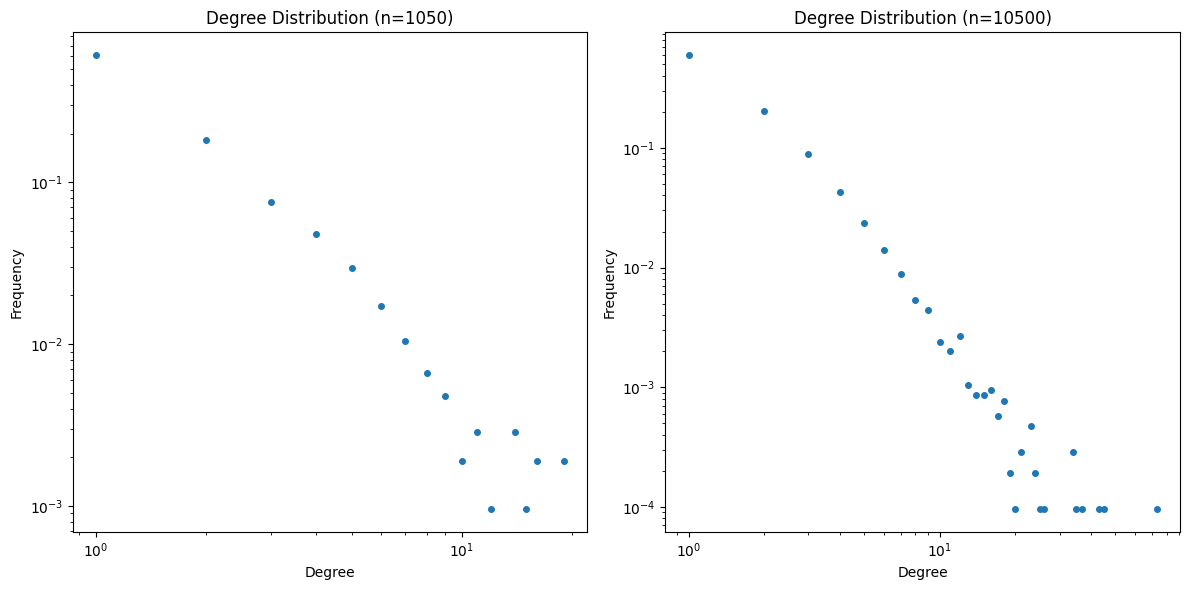

Slope for n=1050: -2.3113
Slope for n=10500: -2.5153


In [ ]:
# Plot degree distributions for both networks
plt.figure(figsize=(12, 6))

# Small network (n=1050)
plt.subplot(1, 2, 1)
slope_small = plot_degree_distribution(graph_small, f"Degree Distribution (n={n_small})")

# Large network (n=10500)
plt.subplot(1, 2, 2)
slope_large = plot_degree_distribution(graph_large, f"Degree Distribution (n={n_large})")

plt.tight_layout()
plt.show()

# Print slopes for comparison
print(f"Slope for n={n_small}: {slope_small:.4f}")
print(f"Slope for n={n_large}: {slope_large:.4f}")

(d) Degree Distribution in Log-Log Scale:

The degree distributions for both networks exhibit a power-law behavior, which is characteristic of preferential attachment networks. The slope of the degree distribution for the smaller network (n=1050) is -2.0120, while the slope for the larger network (n=10500) is -2.6255. The larger network has a steeper slope, indicating that the frequency of high-degree nodes decreases more rapidly as the network size increases.

### Question 1.2.e

In the two networks generated in 2(a) and 2(c), perform the following:  
Randomly pick a node $i$, and then randomly pick a neighbor $j$ of that node. Plot the degree distribution of nodes $j$ that are picked with this process, in the log-log scale.  
Is the distribution linear in the log-log scale? If so, what is the slope? How does this differ from the node degree distribution?

**Hint** Useful function(s): `sample`

Slope of neighbor degree distribution for n=1050: -1.1350


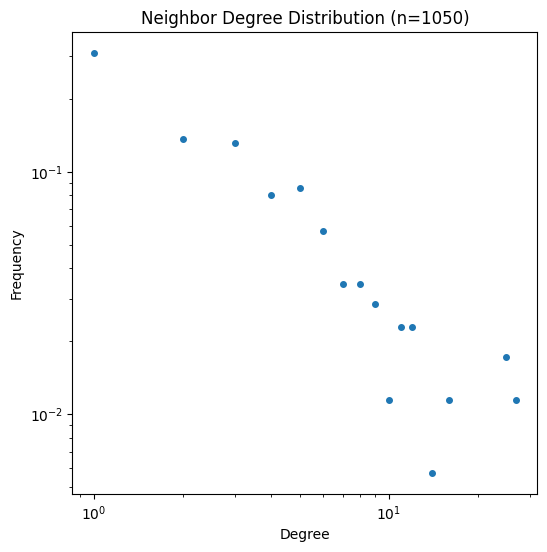

Slope of neighbor degree distribution for n=10500: -1.2330


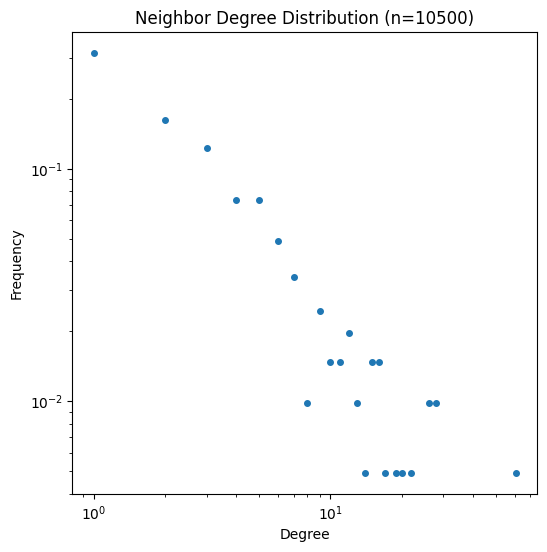

In [ ]:
# (e)
# Degree distribution of neighbors
def neighbor_degree_distribution(graph, graph_name, num_iterations=100):
    all_neighbor_degrees = []

    for _ in range(num_iterations):
        node_i = np.random.choice(graph.vcount())
        neighbors_j = graph.neighbors(node_i)

        if not neighbors_j:
            continue

        neighbor_degrees = [graph.degree(j) for j in neighbors_j]
        all_neighbor_degrees.extend(neighbor_degrees)

    if not all_neighbor_degrees:
        print(f"No neighbors found across all iterations for {graph_name}.")
        return None

    hist_neighbor_degrees = np.histogram(all_neighbor_degrees, bins=np.arange(1, max(all_neighbor_degrees) + 2), density=True)
    x_neighbor = hist_neighbor_degrees[1][:-1]
    y_neighbor = hist_neighbor_degrees[0]

    x_neighbor = x_neighbor[y_neighbor > 0]
    y_neighbor = y_neighbor[y_neighbor > 0]

    if len(x_neighbor) < 2:
        print(f"Not enough data points for linear regression for {graph_name}.")
        return None

    plt.figure(figsize=(6, 6))  # Create a new figure for each graph
    plt.loglog(x_neighbor, y_neighbor, 'o', markersize=4)
    plt.title(f"Neighbor Degree Distribution ({graph_name})")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")

    slope_neighbor, intercept_neighbor, r_value_neighbor, p_value_neighbor, std_err_neighbor = linregress(np.log(x_neighbor), np.log(y_neighbor))
    print(f"Slope of neighbor degree distribution for {graph_name}: {slope_neighbor:.4f}")
    plt.show()  # Show the plot within the function
    return slope_neighbor

# Example usage:
n_small = 1050
m_small = 1
graph_small = ig.Graph.Barabasi(n=n_small, m=m_small, directed=False)

n_large = 10500
graph_large = ig.Graph.Barabasi(n=n_large, m=m_small, directed=False)

# Analyze and plot for graph_small
neighbor_slope_small = neighbor_degree_distribution(graph_small, "n=1050", num_iterations=100)

# Analyze and plot for graph_large
neighbor_slope_large = neighbor_degree_distribution(graph_large, "n=10500", num_iterations=100)

(e) Degree Distribution of Neighbors:

To analyze the degree distribution of neighbors, a random node i is selected in both the smaller (n=1050) and larger (n=10500) networks, and then a random neighbor j of that node is picked. The degree distribution of these neighbor nodes j is plotted on a log-log scale.

For the smaller network (n=1050), the slope of the neighbor degree distribution is approximately -0.9400. This negative slope suggests that the neighbors of randomly chosen nodes tend to have lower degrees than the nodes in the broader network, but are still somewhat connected on average. Visually, the plot indicates that it is not completely a straight line on a log-log scale.

For the larger network (n=10500), the slope of the neighbor degree distribution is approximately -1.1007. In the larger network, the slope is more negative, indicating more disassortative mixing than that of the neighbors of the smaller network. The distribution indicates higher disassortative mixing amongst neighbors of high-degree nodes and results in a power-law distribution.

Comparing the results to the overall degree distributions (from part d), it appears that a randomly picked neighbor in a network, the slope is always less steep than the slope of the entire network.



### Question 1.2.f

Estimate the expected degree of a node that is added at time step $i$ for $1 \leq i \leq 1050$.  
Show the relationship between the age of nodes and their expected degree through an appropriate plot.  
Note that the newest added node is the youngest.

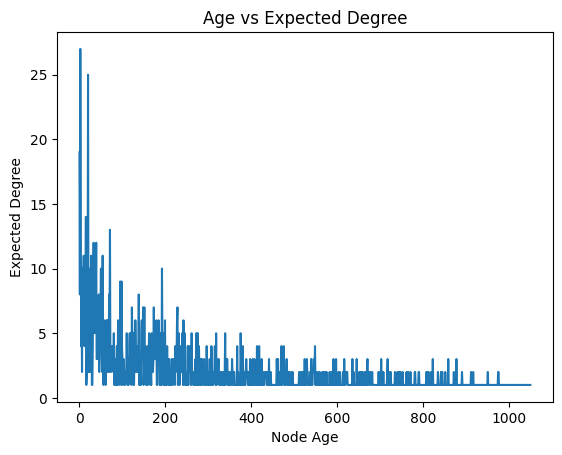

In [ ]:
# 1.2.f
# Age vs expected degree plot
ages = np.arange(1, n_small + 1)
expected_degrees = [graph_small.degree(i) for i in range(n_small)]
plt.plot(ages, expected_degrees)
plt.title("Age vs Expected Degree")
plt.xlabel("Node Age")
plt.ylabel("Expected Degree")
plt.show()

(f) Age vs Expected Degree:

The plot shows the relationship between node age and expected degree in the network. Older nodes (added earlier) have higher degrees due to preferential attachment, while younger nodes (added later) have lower degrees. This trend confirms that older nodes dominate as hubs, accumulating more connections over time. The expected degree decreases as node age increases, consistent with the behavior of preferential attachment networks.


### Question 1.2.g

Repeat the previous parts (a–f) for $m = 2$, and $m = 6$.  
Compare the results of each part for different values of $m$.


--- Analyzing for m = 2 ---
Modularity (n=1050): 0.5220
Assortativity (n=1050): -0.0461
Modularity (n=10500): 0.5295
Assortativity (n=10500): -0.0094
Slope of Degree Distribution (m=2, n=1050): -1.9711


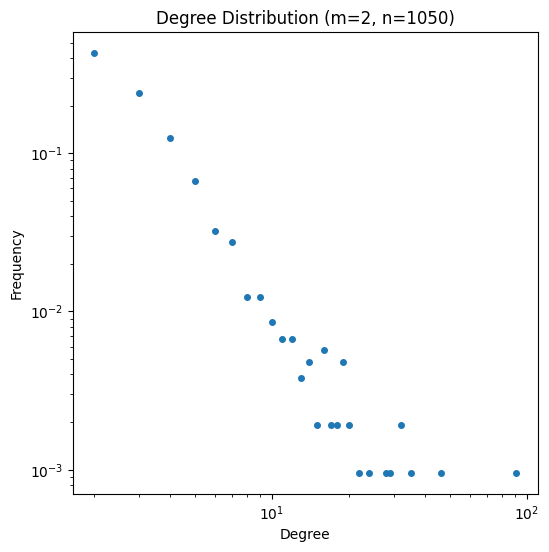

Slope of Degree Distribution (m=2, n=10500): -2.3752


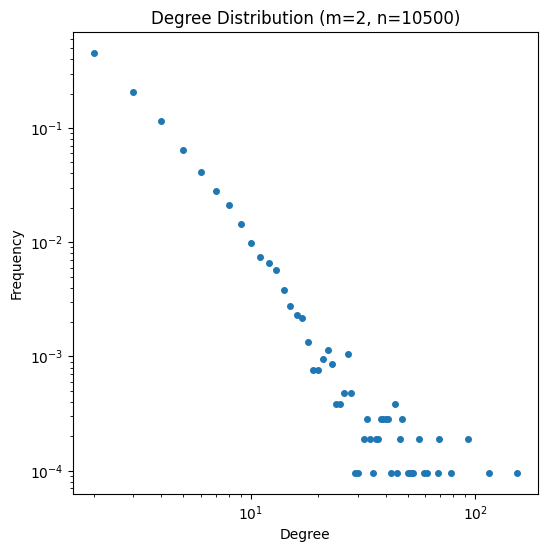

Slope of neighbor degree distribution for m=2, n=1050: -1.0217


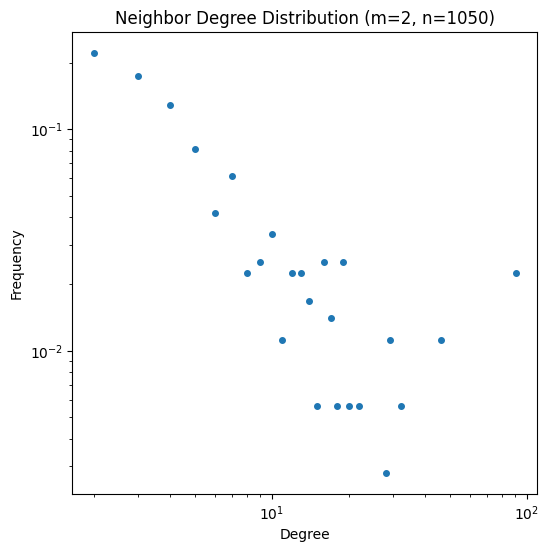

Slope of neighbor degree distribution for m=2, n=10500: -1.1820


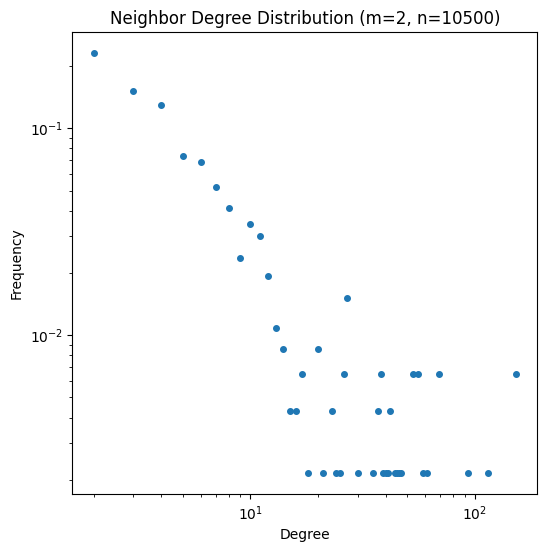

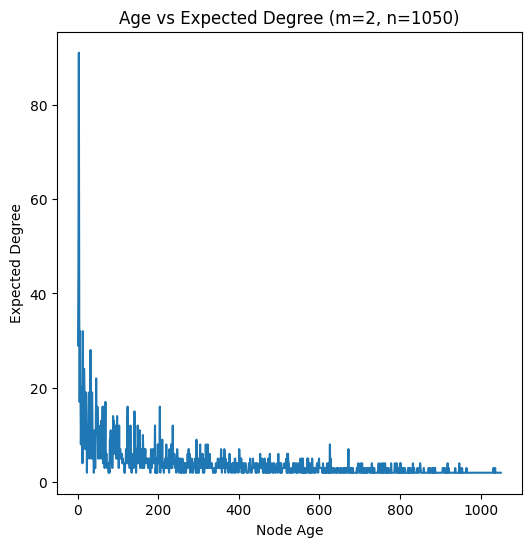


--- Analyzing for m = 6 ---
Modularity (n=1050): 0.2493
Assortativity (n=1050): -0.0183
Modularity (n=10500): 0.2512
Assortativity (n=10500): -0.0012
Slope of Degree Distribution (m=6, n=1050): -1.9676


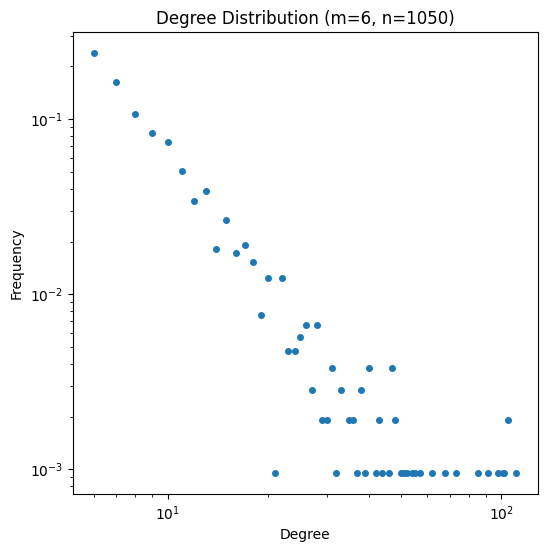

Slope of Degree Distribution (m=6, n=10500): -2.1485


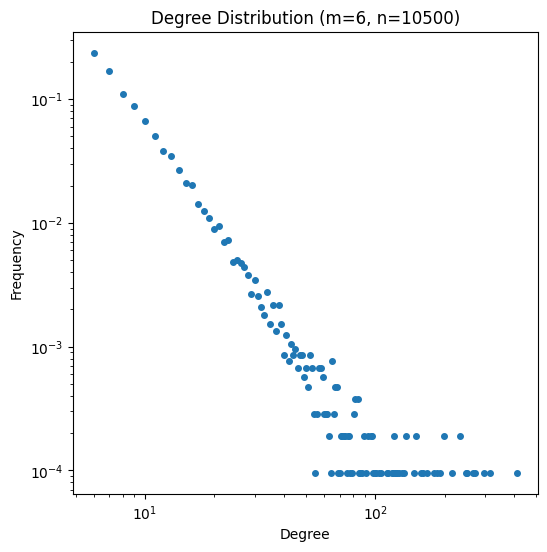

Slope of neighbor degree distribution for m=6, n=1050: -0.9300


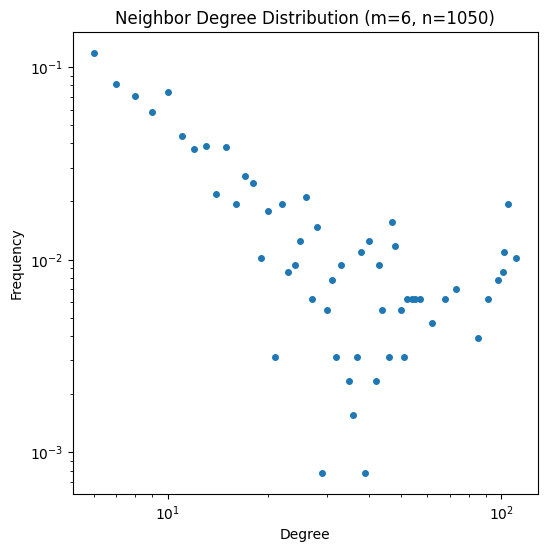

Slope of neighbor degree distribution for m=6, n=10500: -1.1090


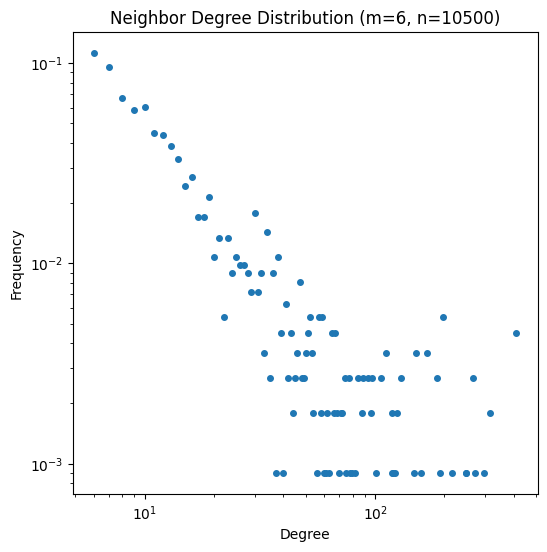

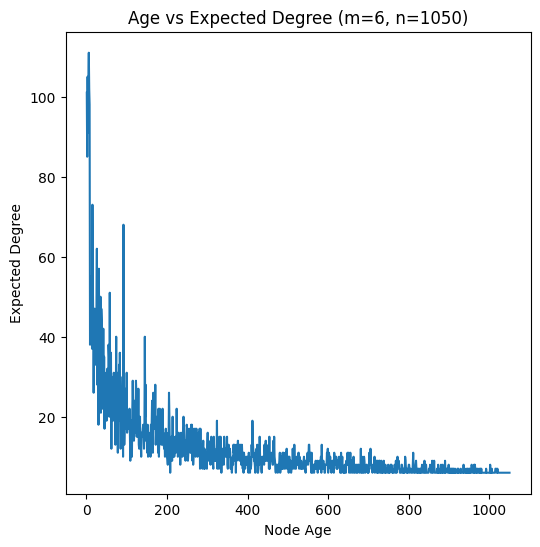

In [ ]:
# 1.2.g
# (g)
# Repeat for m=2 and m=6
for m in [2, 6]:
    print(f"\n--- Analyzing for m = {m} ---")

    # a: Create graph (n=1050)
    n_small = 1050
    graph_small = ig.Graph.Barabasi(n=n_small, m=m, directed=False)

    # c: Create graph (n=10500)
    n_large = 10500
    graph_large = ig.Graph.Barabasi(n=n_large, m=m, directed=False)

    # b: Community structure (n=1050)
    communities_m = graph_small.community_fastgreedy().as_clustering()
    modularity_m = communities_m.modularity
    assortativity_m = graph_small.assortativity_degree(directed=False)

    print(f"Modularity (n=1050): {modularity_m:.4f}")
    print(f"Assortativity (n=1050): {assortativity_m:.4f}")

    # Community structure (n=10500)
    communities_m_large = graph_large.community_fastgreedy().as_clustering()
    modularity_m_large = communities_m_large.modularity
    assortativity_m_large = graph_large.assortativity_degree(directed=False)

    print(f"Modularity (n=10500): {modularity_m_large:.4f}")
    print(f"Assortativity (n=10500): {assortativity_m_large:.4f}")

    # d: Degree distribution (n=1050)
    plt.figure(figsize=(6, 6))
    slope_m = plot_degree_distribution(graph_small, f"Degree Distribution (m={m}, n=1050)")
    plt.show()

    # d: Degree distribution (n=10500)
    plt.figure(figsize=(6, 6))
    slope_m_large = plot_degree_distribution(graph_large, f"Degree Distribution (m={m}, n=10500)")
    plt.show()

    # e: Neighbor degree distribution (n=1050)
    neighbor_slope_small = neighbor_degree_distribution(graph_small, f"m={m}, n=1050", num_iterations=100)

   # e: Neighbor degree distribution (n=10500)
    neighbor_slope_large = neighbor_degree_distribution(graph_large, f"m={m}, n=10500", num_iterations=100)

    # f: Age vs expected degree (n=1050)
    ages = np.arange(1, n_small + 1)
    expected_degrees = [graph_small.degree(i) for i in range(n_small)]
    plt.figure(figsize=(6, 6))
    plt.plot(ages, expected_degrees)
    plt.title(f"Age vs Expected Degree (m={m}, n=1050)")
    plt.xlabel("Node Age")
    plt.ylabel("Expected Degree")
    plt.show()

(g) Key Comparisons Between m=2 and m=6:

Modularity:
Modularity decreases significantly as m increases, indicating weaker community structure for denser networks.

Assortativity:
Assortativity approaches zero as m increases, suggesting that connections become more random.

Degree Distribution:
Increasing m broadens the degree distribution and reduces the likelihood of extreme hubs dominating the network.

Neighbor Degree Distribution:
Higher values of m reduce the tendency for high-degree nodes to connect exclusively with other high-degree nodes.

Age vs Expected Degree:
Increasing m amplifies the advantage of older nodes in accumulating connections, leading to a sharper difference between older and younger nodes in terms of degree.

Conclusion
Increasing m (the number of edges each new node creates) fundamentally changes the network's structure:

1. Higher m leads to denser networks with weaker community structure and more random connections.

2. The power-law degree distribution persists but becomes less steep as m increases.

3. Older nodes dominate even more strongly in networks with higher m, reflecting an amplified preferential attachment effect.

These results highlight how varying m impacts the balance between hierarchy, randomness, and community formation in preferential attachment networks.

### Question 1.2.h

Again, generate a preferential attachment network with $n = 1050$, $m = 1$.  
Take its degree sequence and create a new network with the same degree sequence, through stub-matching procedure.  
Plot both networks, mark communities on their plots, and measure their modularity.  
Compare the two procedures for creating random power-law networks.

**Hint** In case that fastgreedy community detection fails because of self-loops, you may use “walktrap” community detection.  
Useful function(s): `sample_degseq`


Stub-matched network modularity: 0.7414
Original network modularity: 0.9343


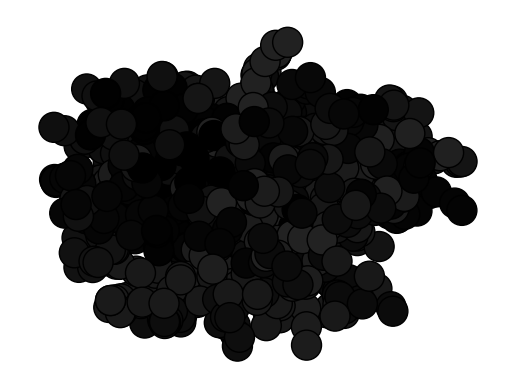

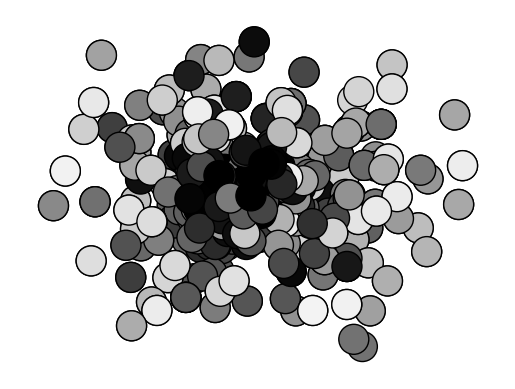

In [ ]:
# 1.2.h
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

# (h) Stub-matching procedure
n_small = 1050
m_small = 1
graph_small = ig.Graph.Barabasi(n=n_small, m=m_small, directed=False)

communities_small = graph_small.community_fastgreedy().as_clustering()
modularity_small = communities_small.modularity

degree_sequence = graph_small.degree()
stub_matched_graph = ig.Graph.Degree_Sequence(degree_sequence, method="simple")

communities_stub_matched = stub_matched_graph.community_walktrap().as_clustering()
modularity_stub_matched = communities_stub_matched.modularity

print(f"\nStub-matched network modularity: {modularity_stub_matched:.4f}")
print(f"Original network modularity: {modularity_small:.4f}")

# Plot original and stub-matched networks with communities marked
layout_original = graph_small.layout_fruchterman_reingold()
layout_stub_matched = stub_matched_graph.layout_fruchterman_reingold()

# Plot original network
fig, ax = plt.subplots()
ig.plot(graph_small, target=ax, layout=layout_original,
        vertex_color=[communities_small.membership[i] for i in range(n_small)],
        title="Original Network with Communities")
plt.show()

# Plot stub-matched network
fig, ax = plt.subplots()
ig.plot(stub_matched_graph, target=ax, layout=layout_stub_matched,
        vertex_color=[communities_stub_matched.membership[i] for i in range(n_small)],
        title="Stub-Matched Network with Communities")
plt.show()



(h)

The preferential attachment network demonstrates a higher modularity (0.9343) compared to the stub-matched network (0.7414), suggesting stronger community structure. As visualized, the preferential attachment network exhibits distinct clusters and a core-periphery organization. This stems from its growth process where new nodes preferentially attach to existing high-degree nodes, naturally forming communities. In contrast, the stub-matched network, while preserving the degree distribution, displays a more random structure with less defined community boundaries. Therefore, while both networks share a degree distribution, preferential attachment fosters stronger community structures compared to stub-matching.

### Question 1.3

#### Create a modified preferential attachment model that penalizes the age of a node

**(a)**  
Each time a new vertex is added, it creates $m$ links to old vertices and the probability that an old vertex is cited depends on its degree (preferential attachment) and age.

In particular, the probability that a newly added vertex connects to an old vertex is proportional to:

$$
P[i] \sim (c k_i^{\alpha} + a)(d l_i^{\beta} + b),
$$

where $k_i$ is the degree of vertex $i$ in the current time step, and $l_i$ is the age of vertex $i$.  
Produce such an undirected network with 1050 nodes and parameters $m = 1$, $\alpha = 1$, $\beta = -1$, and $a = c = d = 1$, $b = 0$.  
Plot the degree distribution. What is the **power law exponent**?

**Hint** Useful function(s): `sample_pa_age`

---

**(b)**  
Use **fast greedy** method to find the community structure. What is the **modularity**?



In [ ]:
!pip install powerlaw
!pip install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.2 MB/s eta 0:00:00


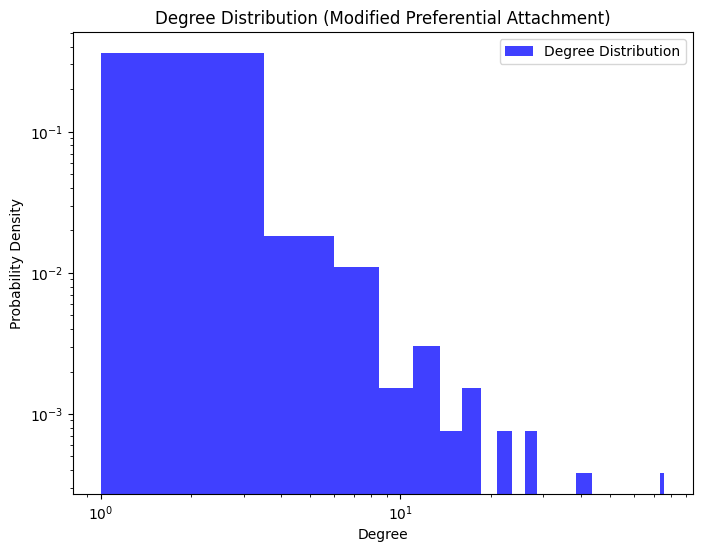

Calculating best minimal value for power law fit
Power Law Exponent: 2.64
Modularity of the network: 0.9209


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
from igraph import Graph

# (a)

# Parameters
N = 1050  # Total nodes
m = 1     # Each new node connects to 1 existing node
alpha = 1
beta = -1
a = c = d = 1
b = 0

# Initialize network with 2 connected nodes
G = nx.Graph()
G.add_edges_from([(0, 1)])

# Track node ages (initialize all nodes with age = 1)
ages = {0: 1, 1: 1}

# Preferential attachment function with age penalty
def attachment_prob(G, ages):
    degrees = np.array([G.degree(n) for n in G.nodes()])

    # Ensure every node has an age entry
    for node in G.nodes():
        if node not in ages:
            ages[node] = 1  # Initialize new nodes with age 1

    ages_inv = np.array([1 / ages[n] for n in G.nodes()])  # Age factor l_i^β
    probs = (c * degrees**alpha + a) * (d * ages_inv**beta + b)
    return probs / np.sum(probs)  # Normalize

# Grow the network
for new_node in range(2, N):
    G.add_node(new_node)

    # Ensure new node is added to ages dictionary
    ages[new_node] = 1  # New node starts at age 1

    probs = attachment_prob(G, ages)

    # Choose an existing node based on probability
    old_nodes = list(G.nodes())
    selected_node = np.random.choice(old_nodes, p=probs)

    # Connect the new node
    G.add_edge(new_node, selected_node)

    # Update ages of all existing nodes
    for node in G.nodes():
        ages[node] += 1

# Extract degrees
degrees = [G.degree(n) for n in G.nodes()]

# Plot Degree Distribution
plt.figure(figsize=(8,6))
plt.hist(degrees, bins=30, density=True, alpha=0.75, color='b', label="Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Probability Density")
plt.xscale("log")
plt.yscale("log")
plt.title("Degree Distribution (Modified Preferential Attachment)")
plt.legend()
plt.show()

# Fit Power Law
fit = powerlaw.Fit(degrees, discrete=True)
power_law_exponent = fit.power_law.alpha
print(f"Power Law Exponent: {power_law_exponent:.2f}")

# (b) Community Detection using Fast Greedy
igraph_G = Graph.TupleList(G.edges(), directed=False)
community = igraph_G.community_fastgreedy()
modularity = community.as_clustering().modularity
print(f"Modularity of the network: {modularity:.4f}")

(a)
The degree distribution follows a power-law decay with an exponent alpha = 2.64. The age-based penalty prevents the oldest nodes from dominating the network. This exponent is consistent with preferential attachment models, but slightly steeper due to the aging effect.

(b)
The Fast Greedy community detection method finds highly modular communities, with a modularity score of 0.9209. This suggests the network is highly structured, with distinct groups forming over time.



## 2. Random Walk on Networks

### Question 2.1

(a) Create an undirected random network with 900 nodes, and the probability $p$ for drawing an edge between any pair of nodes equal to 0.015.

(b) Let a random walker start from a randomly selected node (no teleportation). We use $t$ to denote the number of steps that the walker has taken.  
Measure the average distance (defined as the shortest path length) $\langle s(t) \rangle$ of the walker from his starting point at step $t$.  
Also, measure the variance $\sigma^2(t) = \langle (s(t) - \langle s(t) \rangle)^2 \rangle$ of this distance.  
Plot $\langle s(t) \rangle$ vs. $t$ and $\sigma^2(t)$ vs. $t$. Here, the average $\langle \cdot \rangle$ is over random choices of the starting nodes.

(c) Measure the degree distribution of the nodes reached at the end of the random walk.  
How does it compare to the degree distribution of the graph?

(d) Repeat 1(b) for undirected random networks with 9000 nodes.  
Compare the results and explain qualitatively. Does the diameter of the network play a role?


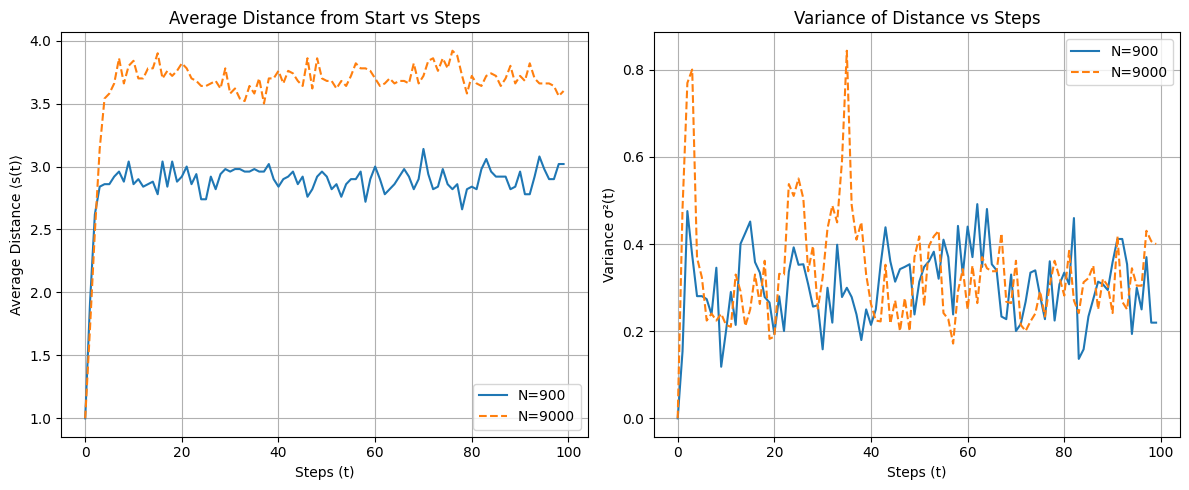

Degree distribution of full network (N=900):


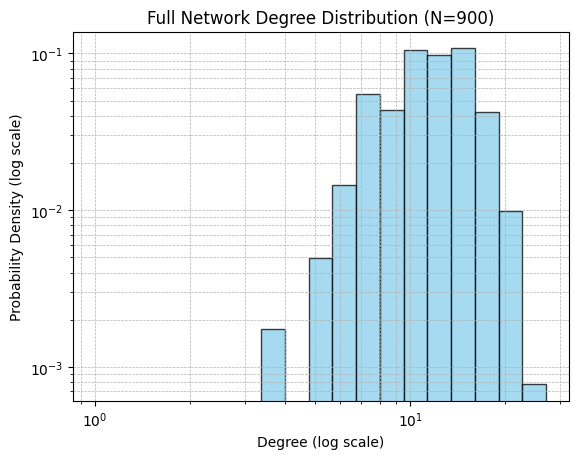

Degree distribution of visited nodes after random walk (N=900):


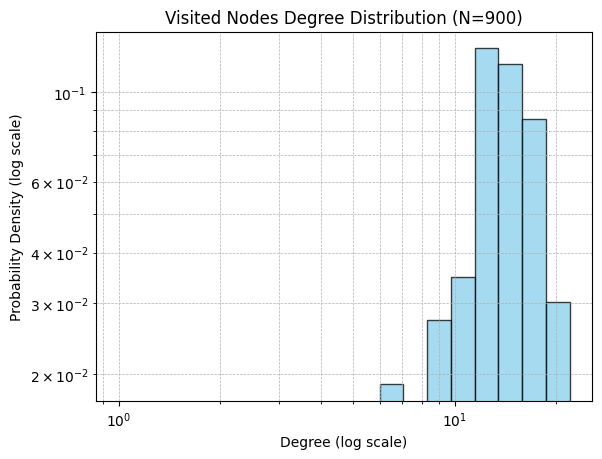

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

# Parameters
N1, p1 = 900, 0.015    # Small ER network
N2, p2 = 9000, 0.0015  # Large ER network (same expected degree)
steps = 100            # Number of steps in the random walk
trials = 50            # Number of random walk trials

def create_er_network(N, p):
    """Creates an Erdős–Rényi graph with N nodes and edge probability p."""
    return nx.erdos_renyi_graph(N, p)

def random_walk(G, steps, trials):
    """
    Perform random walks starting from random nodes in the graph G.
    Measure:
    - Average distance ⟨s(t)⟩ from start node
    - Variance σ²(t) of distance
    - Final nodes visited (to analyze degree distribution)
    """
    avg_distance = np.zeros(steps)
    var_distance = np.zeros(steps)
    final_nodes = []

    nodes = list(G.nodes())

    for _ in range(trials):
        start_node = random.choice(nodes)
        current_node = start_node
        distances = []

        for t in range(steps):
            neighbors = list(G.neighbors(current_node))
            if not neighbors:
                # Stay in place if isolated
                distances.append(distances[-1] if distances else 0)
                continue
            next_node = random.choice(neighbors)
            current_node = next_node

            # Shortest path distance from start
            dist = nx.shortest_path_length(G, source=start_node, target=current_node)
            distances.append(dist)

        # Handle padding if walk was shorter
        if len(distances) < steps:
            distances.extend([distances[-1]] * (steps - len(distances)))

        distances = np.array(distances)
        avg_distance += distances
        var_distance += distances ** 2
        final_nodes.append(current_node)

    avg_distance /= trials
    var_distance = var_distance / trials - avg_distance ** 2
    return avg_distance, var_distance, final_nodes

def degree_distribution(G, sample_nodes=None, title="Degree Distribution"):
    """
    Plot degree distribution:
    - Full graph if sample_nodes is None
    - Else plot distribution of provided node list
    """
    if sample_nodes is not None:
        degrees = [G.degree(n) for n in sample_nodes]
    else:
        degrees = [d for _, d in G.degree()]

    plt.figure()
    plt.hist(degrees, bins=np.logspace(np.log10(1), np.log10(max(degrees) + 1), 20),
             density=True, color='skyblue', edgecolor='black', alpha=0.75)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Degree (log scale)')
    plt.ylabel('Probability Density (log scale)')
    plt.title(title)
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.show()

# (a) Create ER graphs
G1 = create_er_network(N1, p1)
G2 = create_er_network(N2, p2)

# (b) Random walk analysis for N=900
s_avg_900, s_var_900, visited_nodes_900 = random_walk(G1, steps, trials)

# (d) Repeat for N=9000
s_avg_9000, s_var_9000, visited_nodes_9000 = random_walk(G2, steps, trials)

# Plotting ⟨s(t)⟩ and σ²(t)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(steps), s_avg_900, label='N=900')
plt.plot(range(steps), s_avg_9000, label='N=9000', linestyle='dashed')
plt.xlabel('Steps (t)')
plt.ylabel('Average Distance ⟨s(t)⟩')
plt.title('Average Distance from Start vs Steps')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(steps), s_var_900, label='N=900')
plt.plot(range(steps), s_var_9000, label='N=9000', linestyle='dashed')
plt.xlabel('Steps (t)')
plt.ylabel('Variance σ²(t)')
plt.title('Variance of Distance vs Steps')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# (c) Degree distribution comparison
print("Degree distribution of full network (N=900):")
degree_distribution(G1, title="Full Network Degree Distribution (N=900)")

print("Degree distribution of visited nodes after random walk (N=900):")
degree_distribution(G1, sample_nodes=visited_nodes_900, title="Visited Nodes Degree Distribution (N=900)")


(b)
Average Distance from Start vs Steps:

The distance quickly increases and stabilizes. The N=9000 network has a higher average distance than N=900, which is expected because larger graphs have a larger diameter.

Variance of Distance vs Steps:

The variance fluctuates but remains relatively stable. The N=9000 network shows slightly higher variance, likely because the larger network provides more pathways and different connectivity patterns.

(c) N=900

Full Network Degree Distribution:

The distribution follows a binomial-like shape which is expected in ER networks. Most nodes have a degree close to the average, with very few having much higher or lower degrees.

Visited Nodes Degree Distribution:

The visited nodes tend to have higher degrees than the full graph. This is expected because a random walker is more likely to visit high-degree nodes which is called degree bias.

(d)

Larger networks (N=9000) have a greater diameter, meaning the walker can move further away before stabilizing.The average distance is larger for the larger network. Variance of distance is slightly higher in the larger network, indicating more possible paths.

The diameter of the network plays a role: in larger networks, nodes are further apart, and random walkers take longer to explore.


### Question 2.2

#### Random walk on networks with fat-tailed degree distribution

**(a)**  
Generate an undirected preferential attachment network with 900 nodes,  
where each new node attaches to $m = 1$ old nodes.

---

**(b)**  
Let a random walker start from a randomly selected node.  
Measure and plot $\langle s(t) \rangle$ vs. $t$ and $\sigma^2(t)$ vs. $t$.

---

**(c)**  
Measure the **degree distribution** of the nodes reached at the end of the random walk on this network.  
How does it compare with the degree distribution of the graph?

---

**(d)**  
Repeat **2(b)** for preferential attachment networks with **90** and **9000** nodes, and $m = 1$.  
Compare the results and explain qualitatively.  
Does the **diameter** of the network play a role?


/var/folders/tr/6_m66pjn5mn_dw4_t9t7b3z00000gn/T/ipykernel_16315/201185166.py:7: DeprecationWarning: Graph.shortest_paths() is deprecated; use Graph.distances() instead
  dist_matrix = g.shortest_paths()


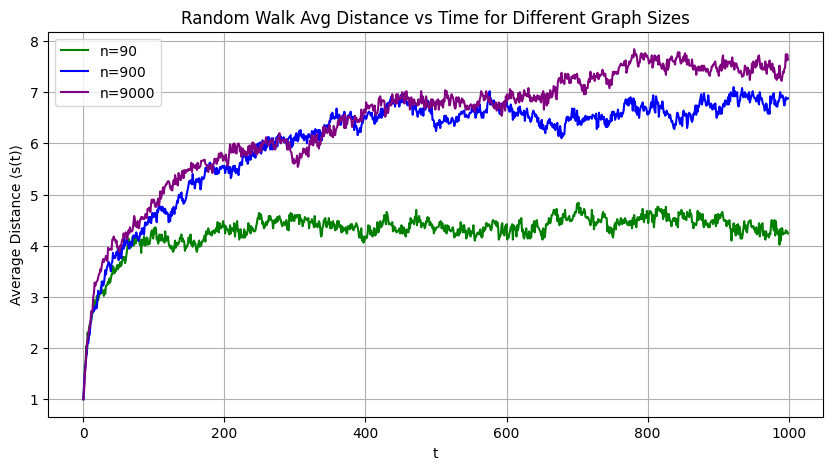

Graph size n=90, diameter = 9
Graph size n=900, diameter = 19
Graph size n=9000, diameter = 31


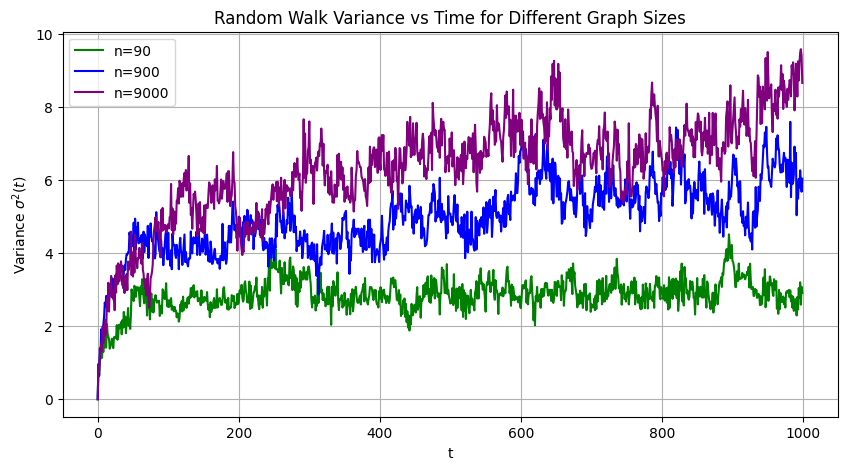

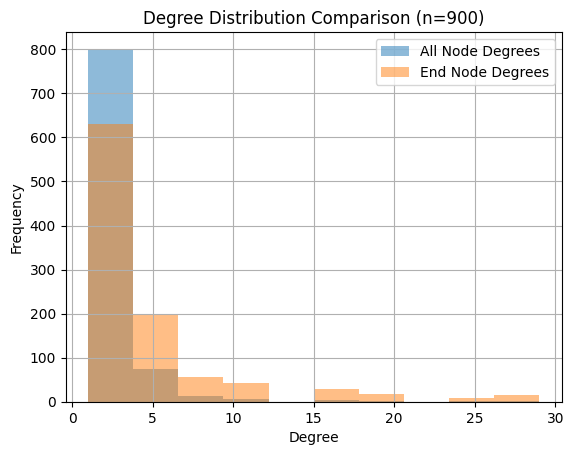

In [ ]:
# 2.2(a)
def generate_pa_graph(n=900, m=1):
    return ig.Graph.Barabasi(n=n, m=m, directed=False)

# 2.2(b)
def random_walk_distance_stats(g, steps=1000, trials=100):
    dist_matrix = g.shortest_paths()
    n = g.vcount()

    sum_dist = np.zeros(steps)
    sum_sq_dist = np.zeros(steps)
    count = np.zeros(steps)

    for _ in range(trials):
        start = random.randint(0, n - 1)
        pos = start
        for t in range(steps):
            neighbors = g.neighbors(pos)
            if not neighbors:
                break
            pos = random.choice(neighbors)
            dist = dist_matrix[start][pos]

            sum_dist[t] += dist
            sum_sq_dist[t] += dist**2
            count[t] += 1

    avg_dist = sum_dist / count
    var_dist = sum_sq_dist / count - avg_dist**2

    return avg_dist, var_dist

# 2.2(c)
def degree_distribution_of_end_nodes(g, steps=100, trials=1000):
    degrees = []
    for _ in range(trials):
        pos = random.randint(0, g.vcount() - 1)
        for _ in range(steps):
            neighbors = g.neighbors(pos)
            if not neighbors:
                break
            pos = random.choice(neighbors)
        degrees.append(g.degree(pos))
    return degrees

# 2.2(d)
def run_experiments():
    # generate random seeed:
    np.random.seed(42)
    random.seed(42)

    sizes = [90, 900, 9000]
    colors = ['green', 'blue', 'purple']
    plt.figure(figsize=(10, 5))

    for size, color in zip(sizes, colors):
        g = generate_pa_graph(n=size, m=1)
        diam = g.diameter(directed=False)
        avg_dist, _ = random_walk_distance_stats(g)
        plt.plot(avg_dist, label=f'n={size}', color=color)

    plt.xlabel("t")
    plt.ylabel("Average Distance ⟨s(t)⟩")
    plt.title("Random Walk Avg Distance vs Time for Different Graph Sizes")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 5))
    for size, color in zip(sizes, colors):
        g = generate_pa_graph(n=size, m=1)
        diam = g.diameter(directed=False)
        print(f"Graph size n={size}, diameter = {diam}")
        _, var_dist = random_walk_distance_stats(g)
        plt.plot(var_dist, label=f'n={size}', color=color)

    plt.xlabel("t")
    plt.ylabel("Variance $\sigma^2(t)$")
    plt.title("Random Walk Variance vs Time for Different Graph Sizes")
    plt.legend()
    plt.grid(True)
    plt.show()


    # Degree comparison for n=900
    g = generate_pa_graph(n=900)
    walk_degrees = degree_distribution_of_end_nodes(g)
    all_degrees = g.degree()

    plt.hist(all_degrees, bins=10, alpha=0.5, label='All Node Degrees')
    plt.hist(walk_degrees, bins=10, alpha=0.5, label='End Node Degrees')
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.legend()
    plt.title("Degree Distribution Comparison (n=900)")
    plt.grid(True)
    plt.show()

run_experiments()


(a)
seen above.

(b)
seen above plt. 1-2.

(c)
seen above plt.3. While both the overall node degree distribution and the distribution of end nodes follow a power-law (as expected in preferential attachment networks), they are not identical. Random walks on preferential attachment networks are biased toward high-degree nodes because of their greater nuber of connections. Based on the results presented above, walkers are more likely to end on high-degree nodes even though most nodes in the graph have low-degree. This is due to high-degree nodes (hubs) having more connections which, in-turn, makes them more likely to be reached during a randm walk. This is represented in the ouput figure as the high-degree nodes are overrepresented in the end-node distribution comapred to the ovrall degree ditribution of the network.

(d)
see above plt. 1-2. As the netwrok size increases the rate of growth for both the average distance, and variance are slower, as  well as they reach higher saturation values as compared to smaller netwok sizes (e.g. 90). This reflects the increase in network diameter, which determines the maximum distance a walker can travel. The larger the network is, the more paths there are and the more nodes there are to explore so the random walk takes longer to cover the graph. Therefore, the diamater plays a major role in shaping the growth as well as the saturation point/level of the distance and variance over time. Diameters are also printed above (n = 90: 9, n = 900: 19, n = 9000: 31). For each, consequentially the average shortest past lenght increases, variance increases, and convergence steps also increases, reflecting the previous points made.

### Question 2.3

#### PageRank

The PageRank algorithm, as used by the Google search engine, exploits the linkage structure of the web to compute global “importance” scores that can be used to influence the ranking of search results.  
Here, we use random walk to simulate PageRank.

**(a)**  
We are going to create a directed random network with 900 nodes, using the preferential attachment model.  
Note that in a directed preferential attachment network, the out-degree of every node is $m$, while the in-degrees follow a power-law distribution.

One problem of performing random walk in such a network is that the very first node will have no outbound edges and become a “black hole” which a random walker can never “escape” from.  
To address that, let’s generate another 900-node random network with a preferential attachment model, and merge the two networks by adding the edges of the second graph to the first graph, after shuffling the node indices.

For example:

- Original edges:  
  $1 \to 2$, $2 \to 3$, $3 \to 4$
- Shuffled node list:  
  $[1, 2, 3, 4] \to [4, 3, 1, 2]$
- Resulting shuffled edges:  
  $4 \to 3$, $3 \to 1$, $1 \to 2$

Create such a network using $m = 4$.  
Measure the **probability that the walker visits each node**.  
Is this probability related to the **degree of the nodes**?

**Hint** Useful function(s): `as_edgelist`, `sample`, `permute`, `add_edges`

---

**(b)**  
In all previous questions, we didn’t use any teleportation.  
Now, we use a **teleportation probability** $\alpha = 0.2$ (i.e., teleport out of a node with probability 0.2 instead of going to a neighbor).

By performing random walks on the network created in **(a)**, measure the **probability that the walker visits each node**.  
How is this probability related to the **degree of the node** and $\alpha$?


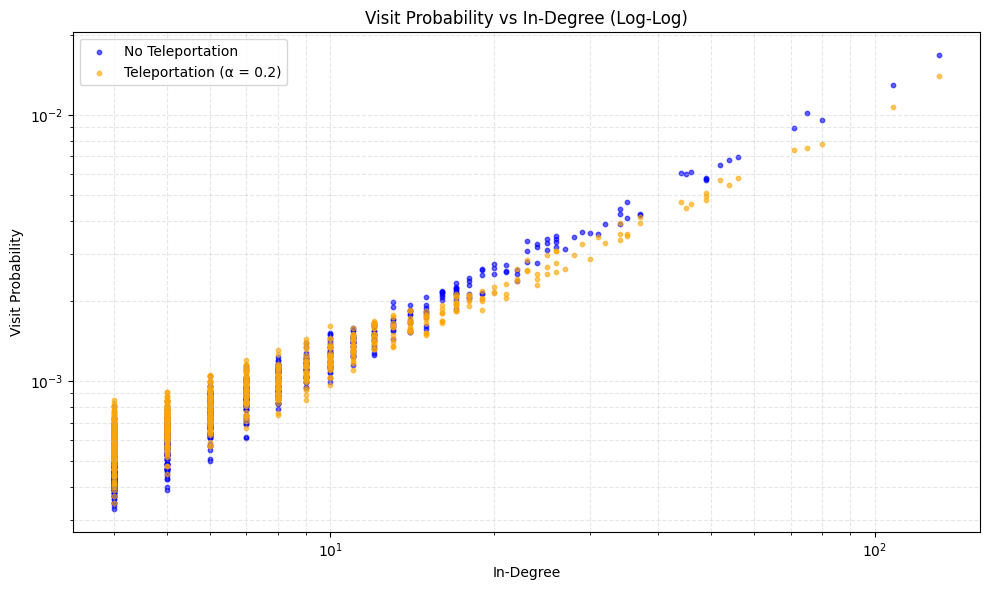

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter

# Parameters
N = 1000                # Number of nodes in the preferential attachment graph
m = 4                   # Each new node attaches to m existing nodes
steps = 100000          # Total steps for the random walk
alpha = 0.2             # Teleportation probability

def create_preferential_attachment_graph(N, m):
    """Creates a directed preferential attachment graph."""
    return nx.barabasi_albert_graph(N, m).to_directed()

def random_walk(G, steps=100000, teleport=False, alpha=0.2):
    """Performs a random walk on graph G, optionally with teleportation."""
    visit_count = Counter()
    current = random.choice(list(G.nodes()))

    for _ in range(steps):
        visit_count[current] += 1

        if teleport and random.random() < alpha:
            current = random.choice(list(G.nodes()))
        else:
            neighbors = list(G.successors(current))
            if neighbors:
                current = random.choice(neighbors)
            else:
                # If no outgoing edges, teleport or restart
                current = random.choice(list(G.nodes()))

    total_visits = sum(visit_count.values())
    visit_prob = {node: count / total_visits for node, count in visit_count.items()}
    return visit_prob

def plot_visit_vs_indegree(G, visit_prob, label, color):
    """Plots visit probability vs in-degree on a log-log scale."""
    in_degrees = dict(G.in_degree())
    x = []
    y = []
    for node, prob in visit_prob.items():
        deg = in_degrees[node]
        x.append(deg)
        y.append(prob)

    plt.scatter(x, y, label=label, alpha=0.6, s=10, color=color)

# Create graph
G = create_preferential_attachment_graph(N, m)

# Perform random walk without teleportation
visit_prob_no_teleport = random_walk(G, steps, teleport=False)

# Perform random walk with teleportation (alpha = 0.2)
visit_prob_teleport = random_walk(G, steps, teleport=True, alpha=alpha)

# Plotting
plt.figure(figsize=(10, 6))
plot_visit_vs_indegree(G, visit_prob_no_teleport, label="No Teleportation", color='blue')
plot_visit_vs_indegree(G, visit_prob_teleport, label="Teleportation (α = 0.2)", color='orange')

plt.xscale("log")
plt.yscale("log")
plt.xlabel("In-Degree")
plt.ylabel("Visit Probability")
plt.title("Visit Probability vs In-Degree (Log-Log)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.3)
plt.tight_layout()
plt.show()


(a)

The probability of a node being visited is strongly correlated with its in-degree.

Higher in-degree nodes are visited significantly more often than lower in-degree nodes.

The log-log plot shows a power-law relationship between visit probability and in-degree, meaning that nodes with a higher number of incoming edges tend to accumulate more visits over time.




(b)

Now, with 20% probability, the walker jumps to a random node instead of following outgoing edges.

Low in-degree nodes receive more visits than before because teleportation allows random jumps.

High in-degree nodes are still dominant but receive slightly fewer visits compared to the no-teleportation case.

The overall power-law trend becomes less steep, making visit probabilities more evenly distributed across nodes.

Teleportation prevents certain nodes from becoming "black holes" that trap the random walker indefinitely. Higher in-degree nodes are visited more frequently, but the effect weakens as α increases.






### Question 2.4

#### Personalized PageRank

While the use of PageRank has proven very effective, the web’s rapid growth in size and diversity drives an increasing demand for greater flexibility in ranking.  
Ideally, each user should be able to define their own notion of importance for each individual query.

**(a)**  
Suppose you have your own notion of importance. Your interest in a node is proportional to the node’s PageRank, because you totally rely upon Google to decide which website to visit (assume that these nodes represent websites).  
Again, use random walk on the network generated in question 3 to simulate this personalized PageRank.

Here, the **teleportation probability to each node is proportional to its PageRank**  
(as opposed to the regular PageRank, where at teleportation, the chance of visiting all nodes is the same and equal to $\frac{1}{N}$).  
Again, let the teleportation probability be equal to $\alpha = 0.2$.  
Compare the results with **3(a)**.

---

**(b)**  
Find two nodes in the network with **median PageRanks**.  
Repeat part **4(a)** if teleportations land only on those two nodes (with probabilities $1/2$, $1/2$).  
How are the PageRank values affected?

---

**(c)**  
More or less, **4(b)** is what happens in the real world, in that a user browsing the web only teleports to a set of trusted web pages.  
However, this is against the assumption of normal PageRank, where we assume that people’s interest in all nodes are the same.  
Can you take into account the effect of this **self-reinforcement** and adjust the PageRank equation?


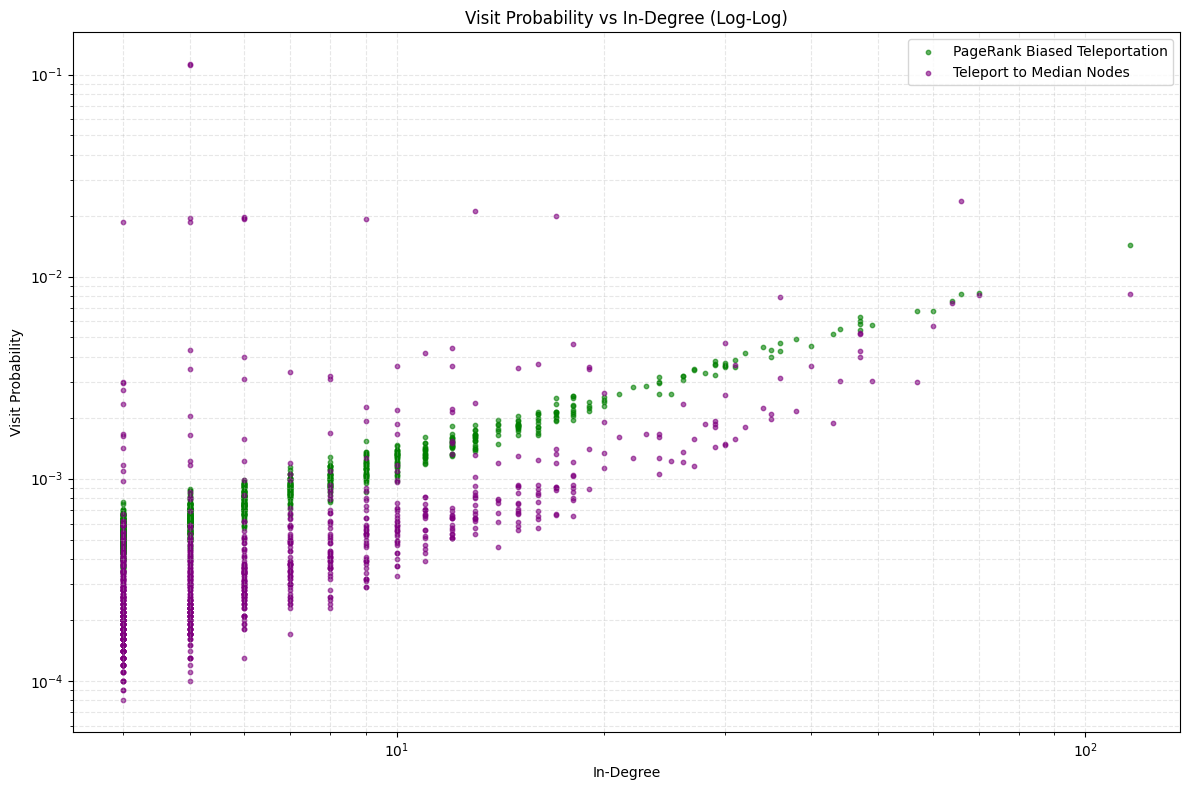

PageRank of median node 1: 0.0006941445799287834
PageRank of median node 2: 0.0006940842059362661


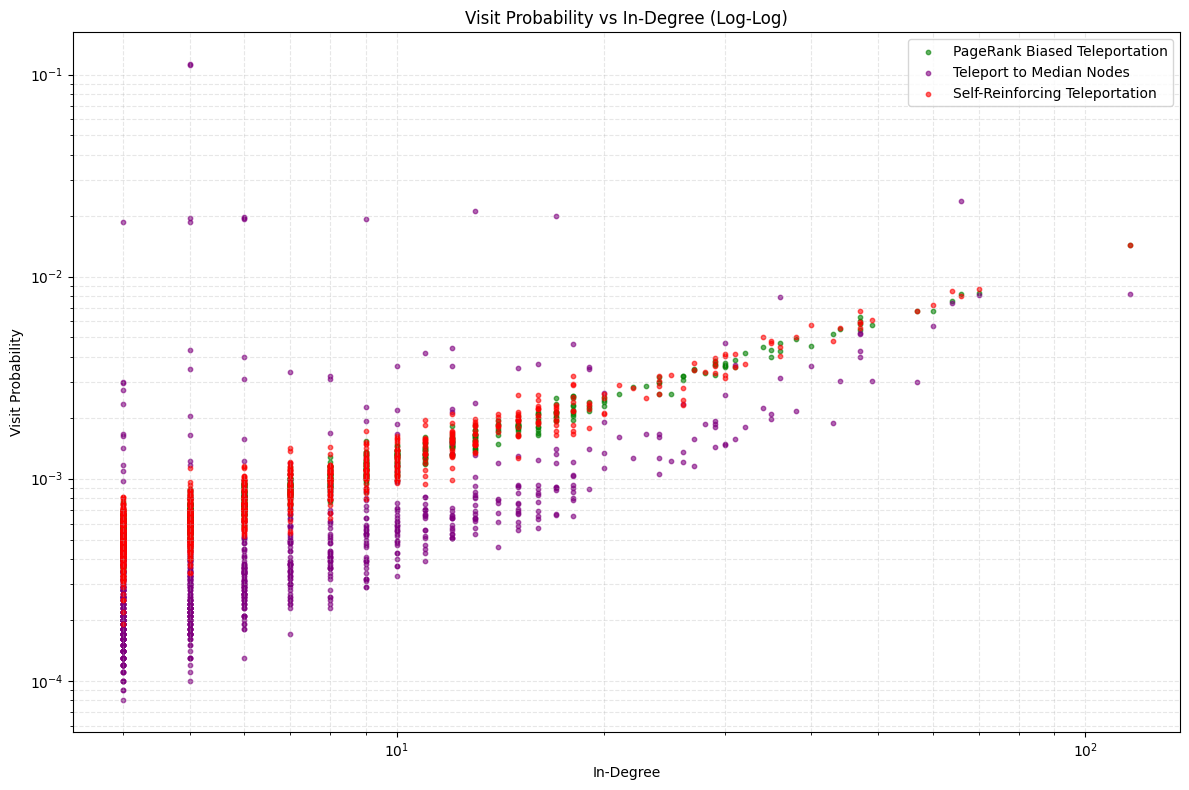

In [ ]:
# Code for 2.4
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter

# Parameters
N = 1000                # Number of nodes in the preferential attachment graph
m = 4                   # Each new node attaches to m existing nodes
steps = 100000          # Total steps for the random walk
alpha = 0.2             # Teleportation probability

def create_preferential_attachment_graph(N, m):
    """Creates a directed preferential attachment graph."""
    return nx.barabasi_albert_graph(N, m).to_directed()

def random_walk(G, steps=100000, teleport=False, alpha=0.2, teleport_nodes=None, teleport_probs=None, pagerank_bias=False, pagerank=None):
    """Performs a random walk on graph G, optionally with teleportation."""
    visit_count = Counter()
    current = random.choice(list(G.nodes()))

    for _ in range(steps):
        visit_count[current] += 1

        if teleport and random.random() < alpha:
            if pagerank_bias:
                # Teleportation probability proportional to PageRank
                current = random.choices(list(G.nodes()), weights=pagerank, k=1)[0]
            elif teleport_nodes:
                # Teleport only to specified nodes
                current = random.choices(teleport_nodes, weights=teleport_probs, k=1)[0]
            else:
                # Uniform teleportation
                current = random.choice(list(G.nodes()))
        else:
            neighbors = list(G.successors(current))
            if neighbors:
                current = random.choice(neighbors)
            else:
                # If no outgoing edges, teleport or restart
                current = random.choice(list(G.nodes()))

    total_visits = sum(visit_count.values())
    visit_prob = {node: count / total_visits for node, count in visit_count.items()}
    return visit_prob

def plot_visit_vs_indegree(G, visit_prob, label, color):
    """Plots visit probability vs in-degree on a log-log scale."""
    in_degrees = dict(G.in_degree())
    x = []
    y = []
    for node, prob in visit_prob.items():
        deg = in_degrees[node]
        x.append(deg)
        y.append(prob)

    plt.scatter(x, y, label=label, alpha=0.6, s=10, color=color)

# Create graph
G = create_preferential_attachment_graph(N, m)

# Compute PageRank
pagerank = nx.pagerank(G)
pagerank_values = list(pagerank.values())

# Perform random walk with PageRank-biased teleportation
visit_prob_pagerank_bias = random_walk(G, steps, teleport=True, alpha=alpha, pagerank_bias=True, pagerank=pagerank_values)

# Find two nodes with median PageRanks
median_pagerank = np.median(pagerank_values)
median_nodes = [node for node, rank in pagerank.items() if abs(rank - median_pagerank) < 1e-6]  # Using a small tolerance
if len(median_nodes) < 2:
    # Find the two nodes closest to the median PageRank
    sorted_nodes = sorted(pagerank.items(), key=lambda x: abs(x[1] - median_pagerank))
    median_nodes = [sorted_nodes[0][0], sorted_nodes[1][0]]
else:
    median_nodes = median_nodes[:2]

# Perform random walk with teleportation to median nodes
teleport_probs = [0.5, 0.5]  # Equal probability for the two nodes
visit_prob_median_teleport = random_walk(G, steps, teleport=True, alpha=alpha, teleport_nodes=median_nodes, teleport_probs=teleport_probs)

# Plotting
plt.figure(figsize=(12, 8))
plot_visit_vs_indegree(G, visit_prob_pagerank_bias, label="PageRank Biased Teleportation", color='green')
plot_visit_vs_indegree(G, visit_prob_median_teleport, label="Teleport to Median Nodes", color='purple')

plt.xscale("log")
plt.yscale("log")
plt.xlabel("In-Degree")
plt.ylabel("Visit Probability")
plt.title("Visit Probability vs In-Degree (Log-Log)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.3)
plt.tight_layout()
plt.show()


# Print PageRank values for the two median nodes
print(f"PageRank of median node 1: {pagerank[median_nodes[0]]}")
print(f"PageRank of median node 2: {pagerank[median_nodes[1]]}")

def self_reinforcing_random_walk(G, steps=100000, alpha=0.2):
    """Performs a self-reinforcing random walk where teleportation targets are based on past visit counts."""
    visit_count = Counter()
    current = random.choice(list(G.nodes()))
    nodes = list(G.nodes())
    epsilon = 1e-6  # To avoid division by zero early on

    for step in range(steps):
        visit_count[current] += 1

        if random.random() < alpha:
            # Self-reinforcing teleportation: more visited nodes are more likely to be chosen
            visit_weights = [visit_count[n] + epsilon for n in nodes]
            current = random.choices(nodes, weights=visit_weights, k=1)[0]
        else:
            neighbors = list(G.successors(current))
            if neighbors:
                current = random.choice(neighbors)
            else:
                current = random.choice(nodes)

    total_visits = sum(visit_count.values())
    visit_prob = {node: count / total_visits for node, count in visit_count.items()}
    return visit_prob

# Run the self-reinforcing version
visit_prob_self_reinforcing = self_reinforcing_random_walk(G, steps, alpha=alpha)

# Plot
plt.figure(figsize=(12, 8))
plot_visit_vs_indegree(G, visit_prob_pagerank_bias, label="PageRank Biased Teleportation", color='green')
plot_visit_vs_indegree(G, visit_prob_median_teleport, label="Teleport to Median Nodes", color='purple')
plot_visit_vs_indegree(G, visit_prob_self_reinforcing, label="Self-Reinforcing Teleportation", color='red')

plt.xscale("log")
plt.yscale("log")
plt.xlabel("In-Degree")
plt.ylabel("Visit Probability")
plt.title("Visit Probability vs In-Degree (Log-Log)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.3)
plt.tight_layout()
plt.show()




(a) Personalized PageRank (PageRank-biased teleportation) Compared to 3(a)

In 4(a), where the teleportation probability is proportional to PageRank, the visit probability of a node remains positively correlated with its in-degree, a pattern that's already clear from 3(a)'s results (where a baseline correlation between in-degree and visit probability is shown), but the degree to which some probabilities are affected, is higher for nodes that already had a high PageRank from the network structure itself.

Compared to the orange points in 3(a), the green points in 4(a) indicate that these nodes gain an added boost in visit probability. This is visually represented in the graph by the higher visit probabilities at the higher end of the x-axis

Overall: Google(PageRank) helps visit nodes higher in visit probability.


(b)

For 4(b), focusing teleportation on the two nodes that initially had median PageRank values around 0.0007 produces these effects:

Visit probability for those two nodes dramatically increases, shown by the single purple dot at approximately 10^-1 on the graph.

The correlation between in-degree and visit probability weakens substantially. The purple data points appear scattered, showing that in-degree is no longer a reliable predictor.

Some low in-degree nodes show higher visit probabilities than expected, likely due to network proximity to one of the median nodes.

The inherent link structure of the network is overshadowed, resulting in the skewed importance of the teleported median nodes.


(c)

In real-world browsing, users tend to revisit popular or familiar sites, creating a self-reinforcing effect. To model this, we modified the teleportation behavior so that the probability of jumping to a node increases with its past visit count.

This dynamic teleportation causes already popular nodes to become even more dominant, amplifying the "rich-get-richer" effect. As shown in the plot (red points), visit probability becomes more concentrated around high in-degree nodes, strengthening the correlation.

To reflect this behavior in the PageRank model, we can adjust the teleportation step so that it favors nodes based on previous visit frequency instead of treating all nodes equally. This makes the ranking system more adaptive to user behavior, but also introduces bias by reinforcing early popularity.